In [1]:
def test_i(input_, func_for_inp, func_prov, i):
    flag_wrong = False
    inp_list = input_[0].split('\n')
    output_list = input_[1].split('\n')
    
    in_tuple = func_for_inp(inp_list)
#     print(f'in_tuple {in_tuple} \noutput_list {output_list}')
    answer = func_prov(*in_tuple).split('\n')
    for (true_an, pred_an) in zip(output_list, answer):
# #         pred_an = str(pred_an)
        if true_an != pred_an:
#             wrong_rez = "\n".join(answer)
            print(f'''\
Error test {i}:
  ожидалось: 
{output_list},
  результат:
{answer}\n''')
            flag_wrong = True
        break
    
    return 1 if flag_wrong else 0
            
def test(input_list, func_for_inp, func_prov):
    n = len(input_list)
    wrong_test_count = 0
    for test_index in range(n):
#         print('   ', input_list[test_index][0])
        wrong_test_count += test_i(input_list[test_index], func_for_inp,
               func_prov, test_index)
    print(f'Count wring test = {wrong_test_count}')

In [2]:
def print_inp(inp_str):
    k = len(inp_str)
    for i in range(k):
        print(f' test {i}:')
        for j in inp_str[i]:
            print(j, end='\n\n')

# A. Partition
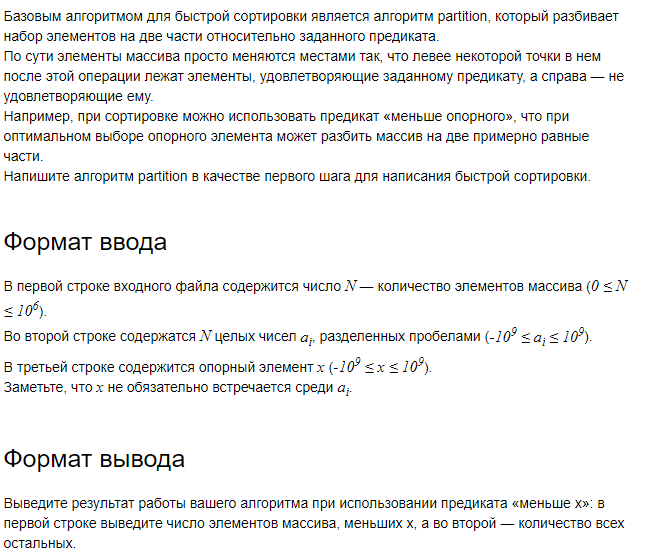

In [3]:
def func_in_A(inp_strs):
    n, a_list, x = inp_strs
    n = int(n)
    a_list = list(map(int, a_list.split()))
    x = int(x)
    return [n, x, a_list]


def func_out_A(n, a_list, x):
    a_new, l_count = partition_my(n, a_list, x)
    return '\n'.join(map(str, [l_count, n - l_count]))
    

In [4]:
input_list_A = [('''\
5
1 9 4 2 3
3''', 
              '''\
2
3'''),
              

('''\
0

0''', '''\
0
0'''),

              
('''\
1
0
0''', 
              '''\
0
1'''),
     
              
('''\
5
1 1 1 1 1
3''',
              '''\
5
0'''),
         
              
('''\
5
1 2 3 4 5
2''',
             '''\
1
4''')]
print_inp(input_list_A)

 test 0:
5
1 9 4 2 3
3

2
3

 test 1:
0

0

0
0

 test 2:
1
0
0

0
1

 test 3:
5
1 1 1 1 1
3

5
0

 test 4:
5
1 2 3 4 5
2

1
4



In [5]:
def partition_my(n, x , input_list, func=lambda a, x_: a < x_):
    a_list = input_list.copy()
    if n == 0:
        return [], 0
    r_index = n 
    l_index = -1
    for l_ind in range(n):
        if l_ind >= r_index:
            break
        if not func(a_list[l_ind] , x):
            
            for r_ind in range(min(r_index, n - 1), l_ind - 1, -1):
                if r_ind == l_ind:
                    r_index = l_ind
                    l_index = l_ind
                elif func(a_list[r_ind], x):
                    a_list[l_ind], a_list[r_ind] = a_list[r_ind], a_list[l_ind]
                    l_index = l_ind
                    r_index = r_ind
                    break     

    return a_list, r_index
       

In [6]:
# n = int(input())
# a_list = list(map(int, input().split()))
# x = int(input())    
# a_new, l_count = partition_my(n, x, a_list)

# print(l_count, n - l_count, sep='\n')

In [7]:
test(input_list_A, func_in_A, func_out_A)

Count wring test = 0


# Вариант 2
Для быстрой сортировки, предыдущий для слияния.

In [8]:
def partition_my(a_list, x, l_index=0, r_index=0, func=lambda a, x_: a < x_):
    '''[l_index, r_index)'''
    r_ind_new = r_index
    if r_index != 0:
        r_ind_new = r_index
        
        for l_ind in range(l_index, r_index):
            if l_ind >= r_ind_new:
                break
            if not func(a_list[l_ind], x):
                for r_ind in range(min(r_ind_new, r_index - 1), l_ind - 1, - 1):
                    if r_ind == l_ind:
                        r_ind_new = l_ind
                    if func(a_list[r_ind], x):
                        a_list[l_ind], a_list[r_ind] = a_list[r_ind], a_list[l_ind]
                        r_ind_new = r_ind
                        break
    return r_ind_new

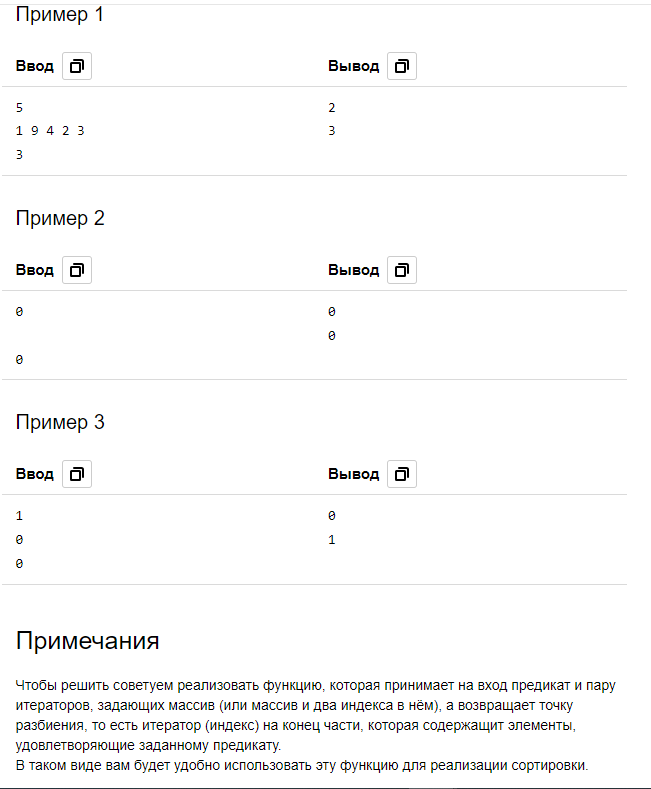

# B. Быстрая сортировка
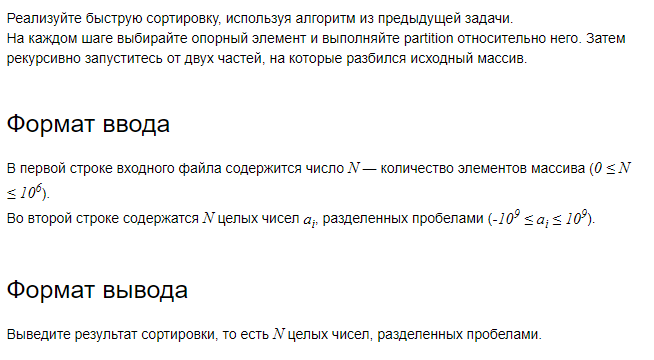

In [10]:
def quick_sort_my(input_list, l_ind=0, r_ind=0, i=-1):
    if l_ind < r_ind - 1 :
        a_x = (input_list[l_ind] + input_list[(r_ind + l_ind) // 2] + input_list[r_ind - 1] )/ 3
        k = partition_my(input_list, a_x, l_ind, r_ind)
        if i != k:
            quick_sort_my(input_list, l_ind, k, k)
            quick_sort_my(input_list, k, r_ind, k)
            
def partition_my(a_list, x, l_index=0, r_index=0, func=lambda a, x_: a < x_):
    '''[l_index, r_index)'''
    r_ind_new = r_index
    if r_index != 0:
        r_ind_new = r_index
        
        for l_ind in range(l_index, r_index):
            if l_ind >= r_ind_new:
                break
            if not func(a_list[l_ind], x):
                for r_ind in range(min(r_ind_new, r_index - 1), l_ind - 1, - 1):
                    if r_ind == l_ind:
                        r_ind_new = l_ind
                    if func(a_list[r_ind], x):
                        a_list[l_ind], a_list[r_ind] = a_list[r_ind], a_list[l_ind]
                        r_ind_new = r_ind
                        break
    return r_ind_new
    
    
# n = int(input())
 
# if n > 0:
#     a_list = list(map(int, input().split()))
#     quick_sort_my(a_list, 0, n)
#     print(*a_list)


In [12]:
input_list_B = [('''\
5
1 9 4 2 3''', 
              '''\
1 2 3 4 9'''),
              

('''\
0
''', '''\
'''),

              
('''\
1
0''', 
              '''\
0'''),
     
              
('''\
5
1 1 1 1 1''',
              '''\
1 1 1 1 1'''),
         
              
('''\
5
1 2 3 4 5''',
             '''\
1 2 3 4 5''')]
print_inp(input_list_B)

 test 0:
5
1 9 4 2 3

1 2 3 4 9

 test 1:
0




 test 2:
1
0

0

 test 3:
5
1 1 1 1 1

1 1 1 1 1

 test 4:
5
1 2 3 4 5

1 2 3 4 5



In [13]:
def func_in_B(inp_strs):
#     print(f'inp_strs   {inp_strs}')
    n, a_list = inp_strs
    n = int(n)
    a_list = list(map(int, a_list.split()))
    return [n, a_list]


def func_out_B(n, a_list):
    quick_sort_my(a_list, 0, n)
    
    return ' '.join(map(str, a_list))

In [41]:
test(input_list_B, func_in_B, func_out_B)

Count wring test = 0


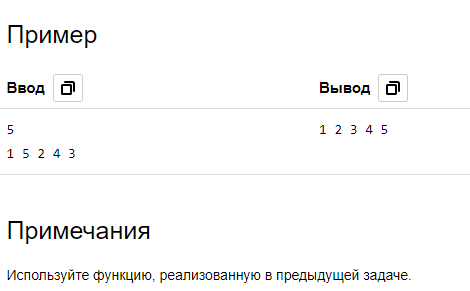

# C. Слияние
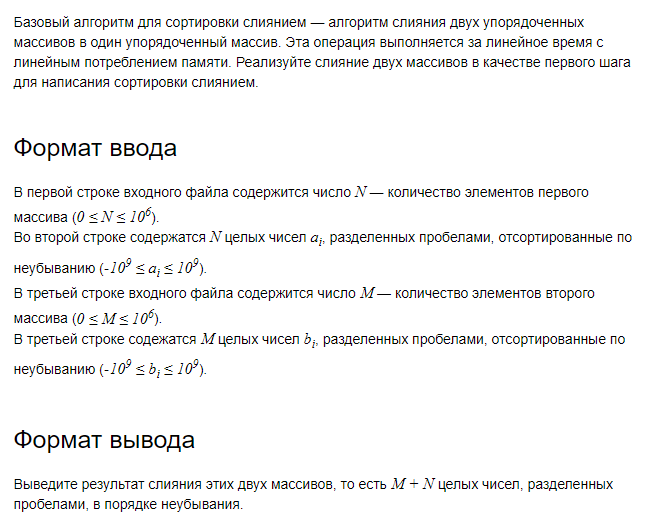

In [16]:
a = [1, 23, [33, 2]]
b = [2, 22, [22, 222]]
a.extend(b)
a

[1, 23, [33, 2], 2, 22, [22, 222]]

In [17]:
def merger_my(a_list, a_count, b_list, b_count):
    new_list = []
    a_ind = 0
    b_ind = 0
    while a_ind < a_count and b_ind < b_count:
        if a_list[a_ind] < b_list[b_ind]:
            new_list.append(a_list[a_ind])
            a_ind += 1
        else:
            new_list.append(b_list[b_ind])
            b_ind += 1
    new_list.extend(a_list[a_ind:a_count])
    new_list.extend(b_list[b_ind:b_count])
    return new_list

In [34]:
a, b = ([int(input()), list(map(int, input().split()))] for i in range(2))
print(*merger_my(a[1], a[0], b[1], b[0])) 

5
1 3 5 5 9
3
2 5 6
1 2 3 5 5 5 6 9


In [22]:
input_list_C = [('''\
5
1 3 5 5 9
3
2 5 6''', 
              '''\
1 2 3 5 5 5 6 9 '''),
              

('''\
1
0
0

''', '''\
0'''),

              
('''\
0

1
0''', 
              '''\
0''')]
print_inp(input_list_C)

 test 0:
5
1 3 5 5 9
3
2 5 6

1 2 3 5 5 5 6 9 

 test 1:
1
0
0



0

 test 2:
0

1
0

0



In [23]:
def func_in_C(inp_strs):
#     print(f'inp_strs   {inp_strs}')
    a_list, a_count, b_list, b_count = inp_strs
    a_count, b_count = int(a_count), int(b_count)
    a_list = list(map(int, a_list.split()))
    b_list = list(map(int, b_list.split()))
    
    n, a_list = inp_strs
    n = int(n)
    a_list = list(map(int, a_list.split()))
    return [a_list, a_count, b_list, b_count]


def func_out_C(a_list, a_count, b_list, b_count):
    new_list = merger_my(a_list, a_count, b_list, b_count)
    
    return ' '.join(map(str, a_list))

In [24]:
test(input_list_B, func_in_B, func_out_B)

Count wring test = 0


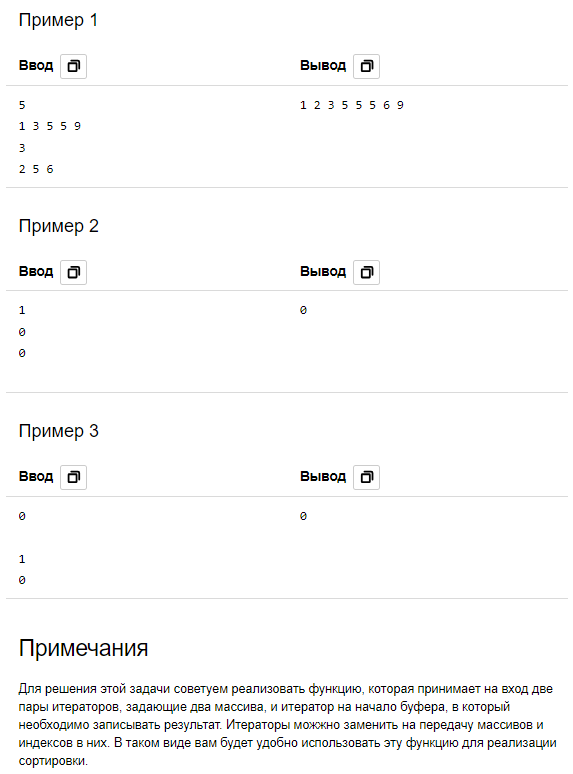

# D. Сортировка слиянием
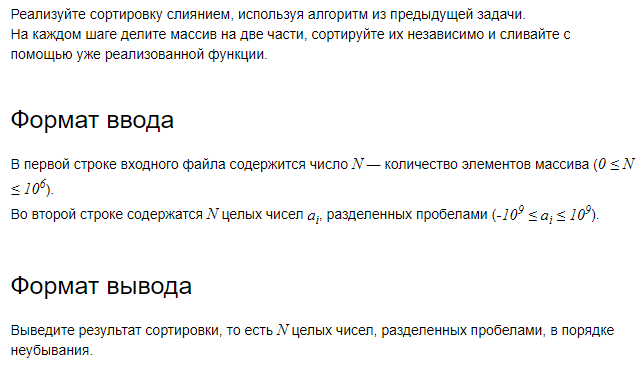

In [35]:
def merge_sort(n_list, n):
    if n <= 1:
        return n_list
    else:
        k = n // 2
        a = merge_sort(n_list[0:k], k)
        b = merge_sort(n_list[k:n], n - k)
        return merger_my(a, k, b, n - k)

In [50]:
n, n_list = int(input()), list(map(int, input().split()))
print(*merge_sort(n_list, n))

5
1 5 2 4 3
1 2 3 4 5


In [46]:
def func_out_D(a_count, a_list):
    new_list = merge_sort(a_list, a_count)
    
    return ' '.join(map(str, new_list))

In [47]:
test(input_list_B, func_in_B, func_out_D)

Count wring test = 0


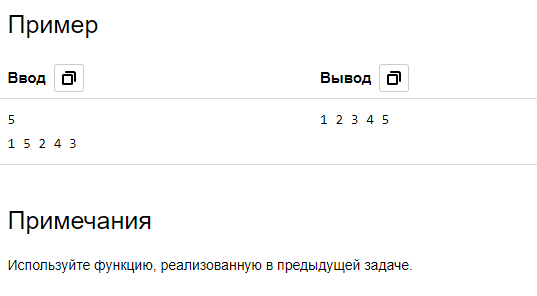

# E. Поразрядная сортировка
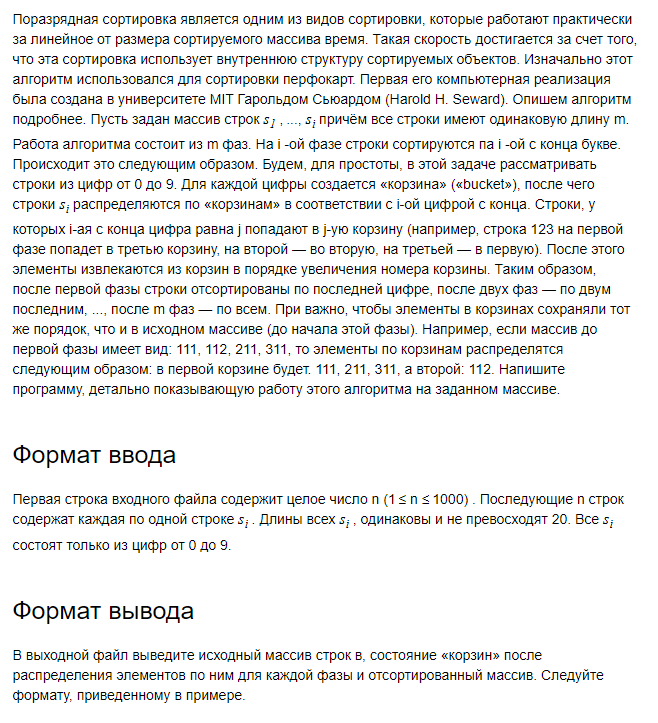

In [127]:
def print_radix(phase, key_buckets, dict_bitwise):
    print(f'Phase {phase}')
    for key_b in key_buckets:
        answer = dict_bitwise.get(key_b, [])
        print(f'Bucket {key_b}: ', end='')
        print(*answer, sep=', ') if answer else print("empty")

def bitwise_dict(a_list, a_count, ind=1):
    dict_buckets = {}
    for a_ind in range(a_count):
        k = a_list[a_ind][- ind]
        dict_buckets[k] = dict_buckets.get(k, []) + [a_list[a_ind]]
    return dict_buckets
    

def radix_sort(key_buckets, key_count, a_list, a_count, len_str):
    new_list = a_list.copy()
    sep_str = '**********\n'
    
    
    print(f'Initial array:')
    print(*new_list, sep=', ', end='\n' + sep_str)
    
    for ind_ in range(1, len_str + 1):
        
        dict_bitwise = bitwise_dict(new_list, a_count, ind_)
        new_list = []
        for ind_key in range(key_count):
            new_list.extend(dict_bitwise.get(key_buckets[ind_key], []))
        print_radix(ind_, key_buckets, dict_bitwise)
        print(end=sep_str)
    
    
    print(f'Sorted array:')
    print(*new_list, sep=', ')        
    return new_list

n = int(input())
n_list = [input() for i in range(n)]
s_ = '0123456789'
len_str = len(n_list[0])
_ = radix_sort(s_, 10, n_list, n, len_str)


In [130]:
input_list_C = '''\
9
12
32
45
67
98
29
61
35
09'''
# n = int(input())
# n_list = [input() for i in range(n)]

s_ = '0123456789'
list_str = input_list_C.split('\n')
n = int(list_str[0])
n_list = list_str[1:]
radix_sort(s_, 10, n_list, n, 2)


Initial array:
12, 32, 45, 67, 98, 29, 61, 35, 09
**********
Phase 1
Bucket 0: empty
Bucket 1: 61
Bucket 2: 12, 32
Bucket 3: empty
Bucket 4: empty
Bucket 5: 45, 35
Bucket 6: empty
Bucket 7: 67
Bucket 8: 98
Bucket 9: 29, 09
**********
Phase 2
Bucket 0: 09
Bucket 1: 12
Bucket 2: 29
Bucket 3: 32, 35
Bucket 4: 45
Bucket 5: empty
Bucket 6: 61, 67
Bucket 7: empty
Bucket 8: empty
Bucket 9: 98
**********
Sorted array:
09, 12, 29, 32, 35, 45, 61, 67, 98


['09', '12', '29', '32', '35', '45', '61', '67', '98']

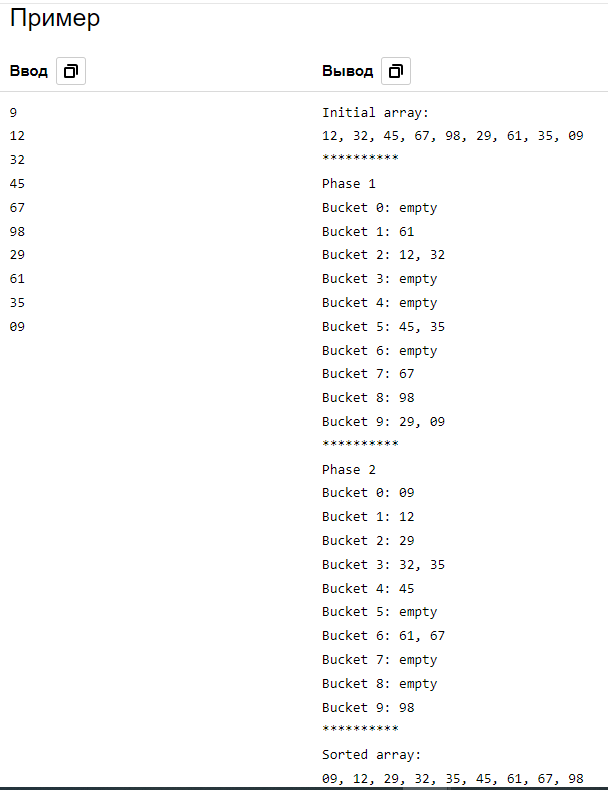